In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Model imports
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

# Cluster evalutations
from sklearn import metrics

In [3]:
results_2014 = pd.read_csv('BOSTON_MARATHON_REVIEW.CSV')
results_2014.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [5]:
results_2014 = results_2014.drop('ctz', axis=1)

In [6]:
results_2014.nunique()

10k           2766
name         31915
division      6979
25k           6570
gender           2
age             64
official     11030
bib          31984
genderdiv    17575
35k           9516
overall      31931
pace           727
state           68
30k           8090
5k            1491
half          5651
20k           5375
country         78
city          5934
40k          10546
dtype: int64

In [7]:
results_2014 = results_2014.drop(['name', 'bib'], axis=1)
results_2014.gender = results_2014.gender.map(lambda x: 0 if x is 'F' else 1)

In [8]:
results_2014.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [9]:
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k          31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(5), object(11)
memory usage: 4.4+ MB


In [10]:
splits = ['5k', '10k', 'half', '20k', '25k', '30k', '40k']

for dist in splits:
    results_2014[dist] = pd.to_numeric(results_2014[dist], errors='coerce')
    results_2014[dist] = results_2014[dist].map(lambda x: results_2014[dist].mean() if x is '-' else float(x))

results_2014.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,0,33,138.95,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,1,41,80.60,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,0,24,140.58,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,1,40,81.23,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [11]:
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k          31934 non-null float64
division     31984 non-null int64
25k          31768 non-null float64
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null float64
5k           31932 non-null float64
half         31912 non-null float64
20k          31933 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float64
dtypes: float64(9), int64(5), object(4)
memory usage: 4.4+ MB


In [12]:
results_2014.country.value_counts().head(20)

USA    27233
CAN     2175
GBR      346
ITA      212
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       89
BRA       87
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
Name: country, dtype: int64

In [13]:
results_2014.state.value_counts().head(20)

MA    7587
CA    2326
NY    1553
ON    1052
PA    1001
TX     992
IL     916
OH     760
FL     750
VA     713
MI     695
NC     618
WA     596
CO     578
NJ     569
MN     556
MD     527
NH     526
CT     521
GA     443
Name: state, dtype: int64

In [14]:
results_2014.city.value_counts().head(20)

Boston           1034
New York          498
Chicago           313
Cambridge         311
Somerville        240
Toronto           240
Brookline         222
Washington        212
Newton            201
Austin            192
San Francisco     192
Portland          191
Arlington         184
San Diego         182
Brighton          151
Seattle           149
Charlestown       148
Houston           138
London            135
Quincy            134
Name: city, dtype: int64

In [15]:
results_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 18 columns):
10k          31934 non-null float64
division     31984 non-null int64
25k          31768 non-null float64
gender       31984 non-null int64
age          31984 non-null int64
official     31984 non-null float64
genderdiv    31984 non-null int64
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31944 non-null float64
5k           31932 non-null float64
half         31912 non-null float64
20k          31933 non-null float64
country      31984 non-null object
city         31983 non-null object
40k          31945 non-null float64
dtypes: float64(9), int64(5), object(4)
memory usage: 4.4+ MB


In [16]:
results_2014 = results_2014.drop(['country','city', 'state', 'genderdiv'], axis=1)

In [17]:
results_2014.head()

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,1,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,0,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,1,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,0,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,1,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


In [18]:
# making sure all genders to binary classifier
results_2014['gender'] = results_2014.gender.map(lambda x: 0 if x is 'F' else 1)

In [19]:
# Convert the marathon numbers to floats.
cols = ['25k', 'half', '30k','10k', '20k', '35k', '40k', '5k']

results_2014[cols] = results_2014[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [20]:
results_2014 = results_2014.dropna()

In [21]:
results_2014.shape

(31649, 14)

In [22]:
results_2014.head()

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,1,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,1,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,1,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,1,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,1,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


In [23]:
# Make sure the number of rows divides evenly into four samples.
rows = results_2014.shape[0] - results_2014.shape[0] % 4
results_2014 = results_2014.iloc[:rows, :]

X = results_2014
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

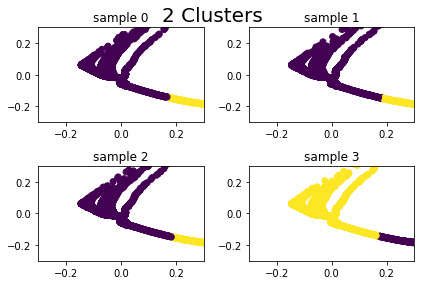

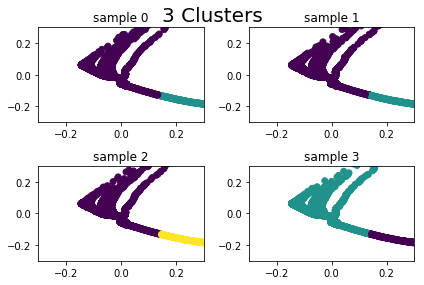

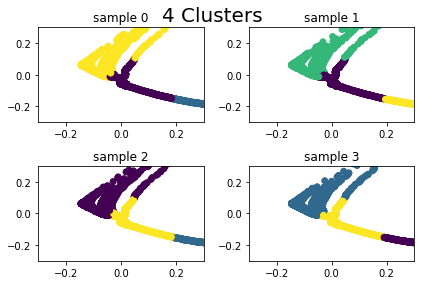

In [24]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

In [25]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7707027638462435
0.7726534159132479
0.7711877632417206
0.7719714820227268


In [26]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','mean_shift', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.1, 0.2, 0.3, 0.4]:
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        # Ensuring all sets are the same lenght
        data = data[:4013][:]
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True)

In [27]:
score_ms.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,mean_shift,quantile,silhouette_score
11,clust5_sample2,NaN,0.4,0.751724
14,clust7_sample3,NaN,0.3,0.749096
6,clust8_sample1,NaN,0.3,0.747874
7,clust7_sample1,NaN,0.4,0.729808
15,clust7_sample3,NaN,0.4,0.722355
10,clust8_sample2,NaN,0.3,0.716149
3,clust7_sample0,NaN,0.4,0.631258
2,clust9_sample0,NaN,0.3,0.627847
12,clust17_sample3,NaN,0.1,0.610037
4,clust22_sample1,NaN,0.1,0.603370


In [ ]:
#Affinity Propagation

# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:4013][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)

In [ ]:
score_af.sort_values(by='AF', ascending=False)

In [ ]:
from scipy.spatial.distance import cdist
# Use the elbow method to see what is the optimal amount of clusters.

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X1)
    kmeanModel.fit(X1)
    distortions.append(sum(np.min(cdist(X1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X1.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
cluster_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(3):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print('\n')
    print(frame.describe())

In [ ]:
# run k-means on the full dataset
n_clusters = 3
km_model = KMeans(n_clusters = n_clusters, random_state = 42)
km_model.fit(X_pred)
# add labels to data for analysis
X_label = X_pred.copy()
X_label['label'] = km_model.labels_

In [ ]:
# look at age histograms by cluster
fig,ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green'}
grouped = X_label.groupby('label')
for key,group in grouped:
    group['age'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.6)
plt.legend()
plt.xlabel('Age')
plt.title('Age Distributions by Cluster')
plt.show()

In [ ]:

# look at pace histograms by cluster
fig,ax = plt.subplots()
for key,group in grouped:
    group['pace'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.7)
plt.legend()
plt.xlabel('Pace')
plt.title('Official Distributions by Cluster')
plt.show()